my version is :  1.13.1
x_train shape: (60000, 28, 28)
y_train shape: (60000,)
x_test shape: (10000, 28, 28)
y_test shape: (10000,)


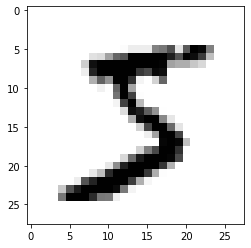

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
y_train_encoded shape: (60000, 10)
y_test_encoded shape: (10000, 10)
x_train_reshaped shape: (60000, 784)
x_test_reshaped shape: (10000, 784)
{0, 1, 2, 3, 9, 11, 14, 16, 18, 23, 24, 25, 26, 27, 30, 35, 36, 39, 43, 45, 46, 49, 55, 56, 64, 66, 70, 78, 80, 81, 82, 90, 93, 94, 107, 108, 114, 119, 126, 127, 130, 132, 133, 135, 136, 139, 148, 150, 154, 156, 160, 166, 170, 171, 172, 175, 182, 183, 186, 187, 190, 195, 198, 201, 205, 207, 212, 213, 219, 221, 225, 226, 229, 238, 240, 241, 242, 244, 247, 249, 250, 251, 252, 253, 255}
{-0.24586749705796307, 1.179567792362865, 1.3068388003468674, 1.803195731484477, 1.6886518242988748, 2.821363795356497, 2.719546988969295, 1.1922948931612651, 1.535926614718072, 1.739560227492476, 2.7959095937596965, 2.770455392162896, 2.1850087554364848, 1.7522873282908762, -0.11859648907396057, 1.090478086774063, 1.9559209410652802, -0.3095030010499643, 2.605003081783693, 2.388642368210889, 1.9431938402668798, 0.12321842609564418, 1.2

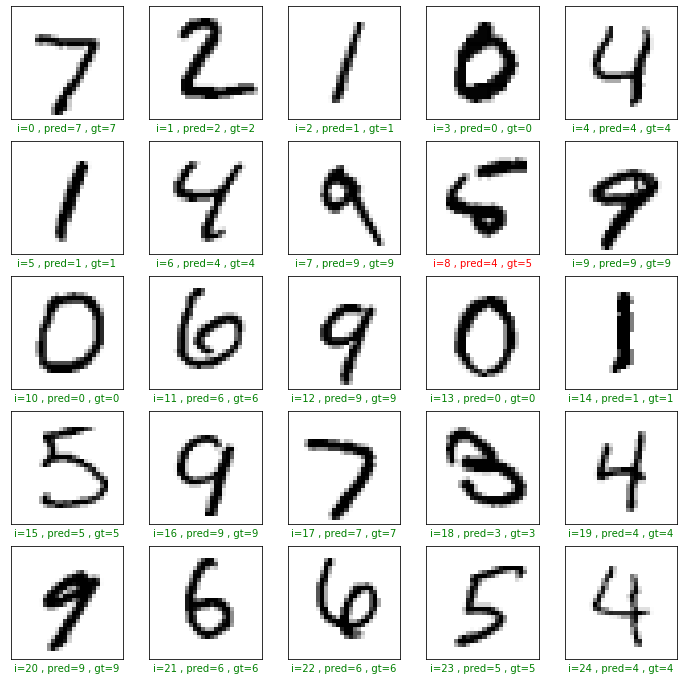

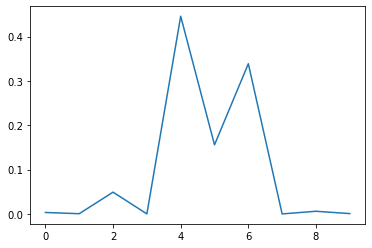

In [4]:
import tensorflow as tf
print("my version is : " , tf.__version__)
from tensorflow.keras.datasets import mnist
(x_train , y_train) , (x_test , y_test) = mnist.load_data()
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print('x_test shape:', x_test.shape)
print('y_test shape:', y_test.shape)
from matplotlib import pyplot as plt
from jedi.api.refactoring import inline
matplotlib = inline
plt.imshow(x_train[0] , cmap='binary') #displaying an example from train data
plt.show()

y_train[0]
print (set(y_train))

from tensorflow.keras.utils import to_categorical #encoding labels
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)
#validated_shapes
print('y_train_encoded shape:', y_train_encoded.shape)
print('y_test_encoded shape:', y_test_encoded.shape)

import numpy as np

x_train_reshaped = np.reshape(x_train , (60000 ,784))
x_test_reshaped = np.reshape(x_test , (10000 ,784))

print('x_train_reshaped shape:' , x_train_reshaped.shape)
print('x_test_reshaped shape:' , x_test_reshaped.shape)

print(set(x_train_reshaped[0]))

#dta-noramlistion
x_mean=np.mean(x_train_reshaped)
x_std=np.std(x_train_reshaped)

epsilon = 0.005

x_train_norm = (x_train_reshaped - x_mean) / (x_std + epsilon) 
x_test_norm = (x_test_reshaped - x_mean) / (x_std + epsilon) #i m not calculating its mean sepratly to reduce anamoly

#display normalised pixel value

print(set(x_train_norm[0]))

#creation of model by divya shukla

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

#i am not defining the input layer because of sequential function it alredy has input in from of examples
#deination of secret layers: ~ divya

model = Sequential([
    Dense(128 ,activation='relu' , input_shape=(784,)), 
     Dense(128 ,activation='relu'),
    #output layer
     Dense(10 ,activation='softmax')
])
    
#compiling the model
model.compile(
    optimizer = 'sgd' , 
    loss='categorical_crossentropy' , 
    metrics = ['accuracy']
)
model.summary()

#training the model~ divya shukla

model.fit(x_train_norm , y_train_encoded , epochs=3)

#evaluating the model ~ divya shukla

_ , accuracy = model.evaluate(x_test_norm , y_test_encoded)
print('test set accuracy:' , accuracy*100)

#predictions

preds = model.predict(x_test_norm)
print('shape of preds: ' , preds.shape)

#plotting result

plt.figure(figsize=(12,12))

start_index = 0 


for i in range(25):
    plt.subplot(5,5, i+1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
        
    pred=np.argmax(preds[start_index+i])
    gt=y_test[start_index+i]
    
    col='g'
    if pred!=gt:
        col='r'
    plt.xlabel('i={} , pred={} , gt={}'.format(start_index+i , pred , gt) , color=col)
    plt.imshow(x_test[start_index+i] , cmap = 'binary')
    
plt.show()


plt.plot(preds[8])
plt.show()
